# 📊 Data Analysis & Dashboard

## 📖 Indice
1. Import librerie
2. Caricamento dataset
3. Pulizia ed esplorazione dati
4. Calcolo KPI
5. Visualizzazioni
6. Preparazione dashboard Streamlit

## 📦 Import librerie

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import streamlit as st

## 📂 Caricamento dataset

In [4]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 🧹 Pulizia ed esplorazione dati

In [5]:
df.info()
df.describe()
df.isnull().sum()
df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Year'] = df['Year'].fillna(0).astype(int)
df_clean = df.dropna(subset=['Year'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 📈 Calcolo KPI

In [6]:
#Total number of unique game among all the platform available
total_game = df_clean['Name'].nunique()
print(f"The total number of unique videogame in our dataset is: {total_game}")

#Total global sales for each videogame (in millions), we don't use the clean dataset because we are dont need to in this case
total_sales = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending = False)
print(f"The total number of global sales is:\n{total_sales.head(10)}")

#Platform with the most game
game_pp = df_clean.groupby('Platform')['Name'].count().sort_values(ascending = False)
print(f"The total game per platform is:\n{game_pp.head(5)}")

#Year with the most game released
best_year = df_clean.groupby('Year')['Name'].count().sort_values(ascending = False)
print(f"The most number of game where released in:\n{best_year.head(5)}")

#Top 5 publisher by sales
top_publisher = df_clean.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False)
print(f"The top 5 publisher by sales are:\n{top_publisher.head(5)}")

#Sales by platform
sales_pp = df_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False)


The total number of unique videogame in our dataset is: 11493
The total number of global sales is:
Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Black Ops           31.03
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Name: Global_Sales, dtype: float64
The total game per platform is:
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Name, dtype: int64
The most number of game where released in:
Year
2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
Name: Name, dtype: int64
The top 5 publisher by sales are:
Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment    

## Visualizzazioni

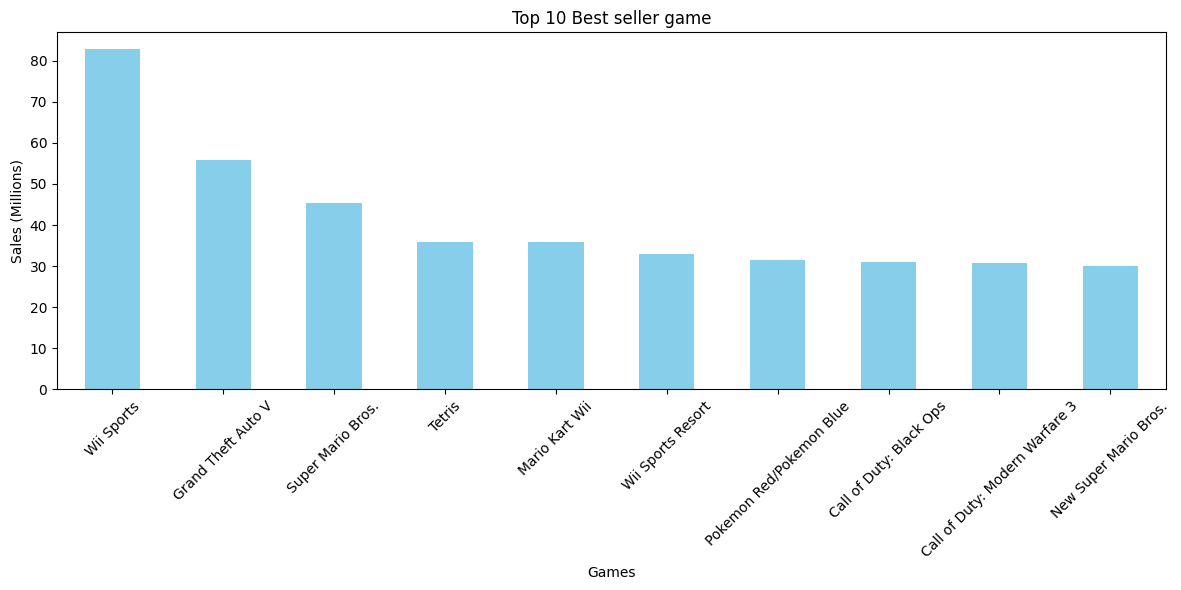

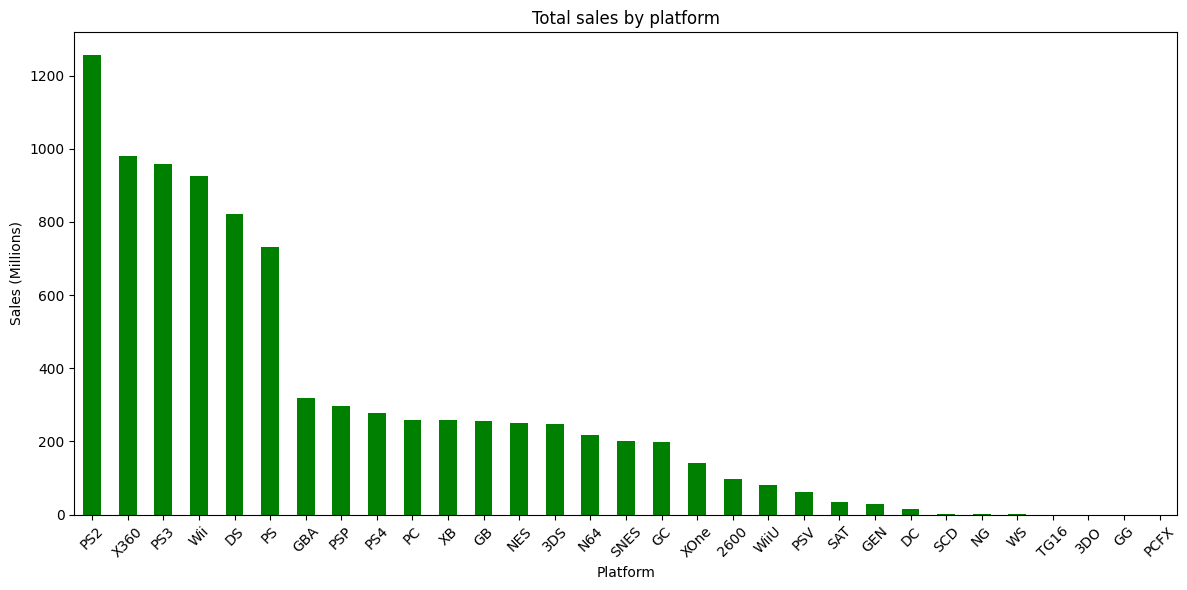

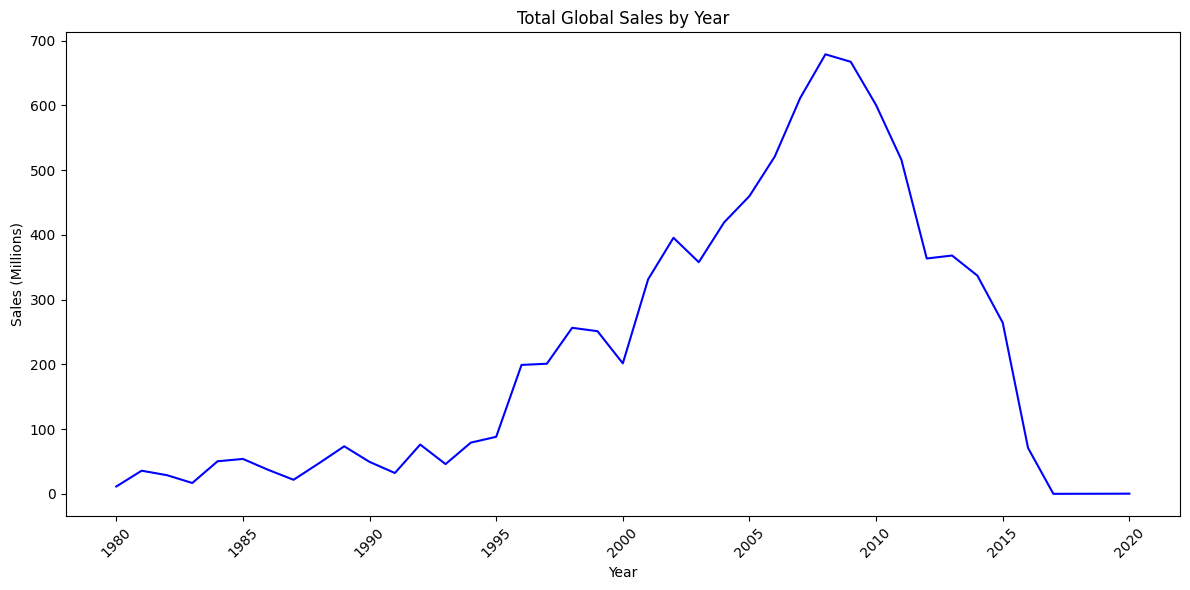

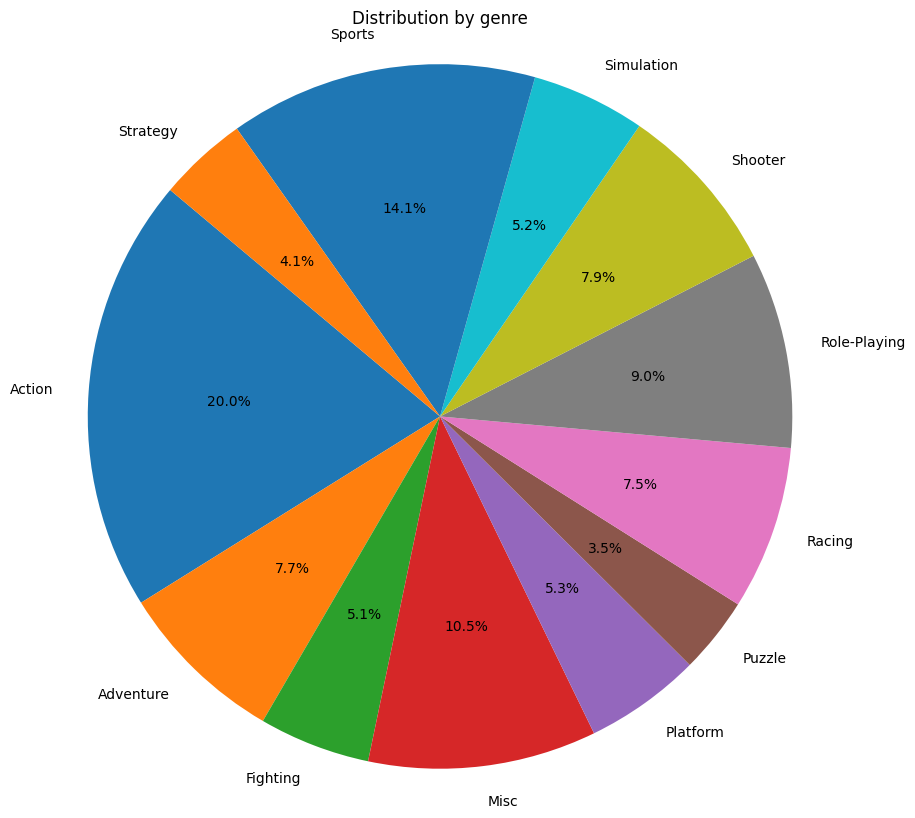

In [7]:
#Top 10 game by sale
top_10_games = total_sales.head(10)

plt.figure(figsize=(12,6))
top_10_games.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best seller game')
plt.xlabel('Games')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Total sales by platform
top_platform = sales_pp

plt.figure(figsize=(12,6))
top_platform.plot(kind='bar', color='green')
plt.title('Total sales by platform')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Sales by Year
df_valid_years = df_clean[(df_clean['Year'] >= 1980) & (df_clean['Year'] <= 2020)]

sales_per_year = df_valid_years.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12,6))
sales_per_year.plot(kind='line', color='blue')
plt.title('Total Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Game distribution by genre
game_dist = df_clean.groupby('Genre')['Name'].count()

plt.figure(figsize=(10,10))
plt.pie(game_dist, labels=game_dist.index, autopct='%1.1f%%', startangle=140) #%1.1f%% - >  mostra la percentuale con una cifra decimale
plt.title('Distribution by genre')
plt.axis('equal') #For a perfect circle
plt.show()



In [8]:
# Codice base Streamlit:
#GitHub

## 📈 Conclusioni e Insight

- 🎮 **Numero totale di giochi unici**: il dataset contiene **16.598 titoli**, distribuiti su diverse piattaforme.
- 🥇 **Top 10 giochi più venduti**: dominano titoli storici come Wii Sports, Super Mario Bros e Mario Kart Wii, segno dell’influenza Nintendo sul mercato.
- 💾 **Piattaforma con più giochi**: PS2 risulta essere la piattaforma con il maggior numero di titoli rilasciati, seguita da Xbox360 e PS3.
- 📅 **Anno di picco**: il maggior numero di titoli è stato pubblicato nel **2009**, confermando il periodo d'oro del settore gaming console.
- 🏆 **Top publisher**: Nintendo guida nettamente la classifica dei publisher con il maggior volume di vendite globali.
- 🌍 **Distribuzione per genere**: il genere più diffuso è **Action**, seguito da **Sports** e **Misc**, con gli RPG che mantengono una quota significativa.
- 📈 **Andamento vendite**: picco di vendite globali nel periodo **2006-2009**, coerente con il boom di console Wii, Xbox 360 e PS3.

## 📌 Considerazioni finali:
- Il mercato videoludico ha vissuto il suo massimo storico tra il 2006 e il 2009.
- Nintendo mantiene un ruolo dominante sia per numero di titoli che per vendite complessive.
- Il genere Action è quello più prodotto, ma Sports e RPG restano forti segmenti di mercato.

## 🔍 Suggerimenti futuri:
- Aggiungere un’analisi regionale più dettagliata (NA, EU, JP)
- Creare una dashboard interattiva con Streamlit per navigare tra KPI e filtri
- Integrare nuovi dataset più aggiornati o su vendite digitali
